# Supporting material for "Clarification of the opposite pattern of cognitive performance in autistic individuals with and without alexithymia"

The purpose of the present document is to elaborate on the details of the analyses presented in our commentary article "An opposite pattern of cognitive performance in autistic individuals with and without alexithymia" and address the criticism presented by Oakley and coworkers in their response.

The aim of the analysis is to examine the relationship between alexithymia, measured using the Toronto Alexithymia Scale (TAS), and emotional and cognitive theory of mind, measured using the Reading the Minds in the Eyes Task (RMET) and the Movie for Assessment of Social Cognition (MASC), in individuals with and without autism.

This was also studied in the original research article by Oakley et al (2016), and thus the specific aim of this analysis is to examine whether the relationships between alexithymia and theory of mind differ between the autistic and non-autistic groups. In other words, to examine the interaction between autism/control group and TAS score, which Oakley et al. (2016) did not do.

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

%matplotlib inline

def summarize_model(model):
    res = anova_lm(model, typ=2).round(5)
    res["coef"] = model.params
    res["p"] = res["PR(>F)"]
    res = res[["coef", "sum_sq", "df", "p"]]
    return res

def plot_correlations():
    plt.figure(figsize=[10, 7])
    plt.subplot(2, 2, 1)
    plt.title("ASD group", fontsize=20)
    sbn.regplot(x="TAS_Total", y="MASC_Cognitive", data=asd_df, ci=0)
    plt.subplot(2, 2, 2)
    plt.title("Control group", fontsize=20)
    sbn.regplot(x="TAS_Total", y="MASC_Cognitive", data=ctl_df, ci=0)
    plt.subplot(2, 2, 3)
    sbn.regplot(x="AQ_Total", y="MASC_Cognitive", data=asd_df, ci=0)
    plt.subplot(2, 2, 4)
    sbn.regplot(x="AQ_Total", y="MASC_Cognitive", data=ctl_df, ci=0)
    plt.subplots_adjust(hspace=0.4)

In [2]:
# Load the data
df = pd.read_csv("Oakley(2016)RMETforEMR.csv", sep=";")

# Calculate MASC-Emotion from MASC-Total and MASC-Cognitive
df["MASC_Emotion"] = df["MASC_Total"] - df["MASC_Cognitive"]

To test the interaction between TAS and group, we fit linear models for the following dependent variables:
- RMET-Total
- MASC-Cognitive
- MASC-Emotion
- MASC-Total

As independent variables we include group (ASD/control), TAS, gender, and the interaction term between group and TAS

In [3]:
# RMET
model = smf.ols(
    "RMET_Total ~ TAS_Total + ASD_Control + Gender + ASD_Control:TAS_Total", data=df
).fit()
print("Results for RMET:")
summarize_model(model)

Results for RMET:


,coef,sum_sq,df,p
TAS_Total,-0.072014,51.77025,1.0,0.03301
ASD_Control,3.194236,0.08707,1.0,0.92812
Gender,-0.131337,0.15043,1.0,0.90561
ASD_Control:TAS_Total,-0.055375,4.68794,1.0,0.50924
Residual,NaN,390.48596,37.0,NaN


We see that the interaction effect is not significant.

In [4]:
# MASC-Cognitive
model = smf.ols(
    "MASC_Cognitive ~ TAS_Total + ASD_Control + Gender + ASD_Control:TAS_Total",
    data=df[df["mv_outlier"] == 0]
).fit()
print("Results for MASC-Cognitive:")
summarize_model(model)

Results for MASC-Cognitive:


,coef,sum_sq,df,p
TAS_Total,-0.051138,0.43714,1.0,0.79560
ASD_Control,-12.366478,61.06386,1.0,0.00391
Gender,1.491953,19.35366,1.0,0.09104
ASD_Control:TAS_Total,0.173520,45.09155,1.0,0.01187
Residual,NaN,231.07322,36.0,NaN


We see that the interaction effect is significant.

In [5]:
# MASC-Emotion
model = smf.ols(
    "MASC_Emotion ~ TAS_Total + ASD_Control + Gender + ASD_Control:TAS_Total",
    data=df[df["mv_outlier"] == 0]
).fit()
print("Results for MASC-Emotion:")
summarize_model(model)

Results for MASC-Emotion:


,coef,sum_sq,df,p
TAS_Total,-0.035316,3.21465,1.0,0.37216
ASD_Control,-3.393869,16.43146,1.0,0.04841
Gender,0.543761,2.57080,1.0,0.42431
ASD_Control:TAS_Total,0.036296,1.97294,1.0,0.48352
Residual,NaN,141.70520,36.0,NaN


We see that the interaction effect is not significant.

In [6]:
# MASC-Total
model = smf.ols(
    "MASC_Total ~ TAS_Total + ASD_Control + Gender + ASD_Control:TAS_Total",
    data=df[df["mv_outlier"] == 0]
).fit()
print("Results for MASC-Total:")
summarize_model(model)

Results for MASC-Total:


,coef,sum_sq,df,p
TAS_Total,-0.086454,1.28093,1.0,0.76154
ASD_Control,-15.760348,140.84731,1.0,0.00282
Gender,2.035714,36.03184,1.0,0.11358
ASD_Control:TAS_Total,0.209816,65.92852,1.0,0.03480
Residual,NaN,493.19459,36.0,NaN


We see that the interaction effect is significant.

For RMET there was no significant interaction effect of group and TAS. Thus the effect of alexithymia on RMET is not different for the two groups, and the independent analyses of the effects of autism and alexithymia, as done in Oakley et al (2016) is valid.

For both MASC-Total and MASC-Cognitive, the interaction between group and TAS was significant. This means that it is not meaningful to simply examine the main effects of autism and alexithymia on MASC scores. Instead, separate analyses of the effects of TAS on MASC should be performed for the two groups.

For MASC-Emotion the interaction was not significant. Since MASC-Total is merely the sum of MASC-Cognitive and MASC-Emotion, we will focus on analysing the effects of TAS on MASC-Cognitive in the autism and control groups, respectively.

In [7]:
# Separate the data into the two groups and exclude the outlier (as detected and flagged by Oakley et al. (2016))
asd_df = df[(df["ASD_Control"] == 1) & (df["mv_outlier"] == 0)]
ctl_df = df[(df["ASD_Control"] == 0) & (df["mv_outlier"] == 0)]

### Control group

We start by investigating the effects of TAS on MASC-Cognitive in the control group, while also including gender and AQ as control variables.

In [8]:
model = smf.ols("MASC_Cognitive ~ Gender + AQ_Total + TAS_Total", data=ctl_df).fit()
print("Regression results for MASC-Cognitive in the control group:")
summarize_model(model)

Regression results for MASC-Cognitive in the control group:


,coef,sum_sq,df,p
Gender,2.578801,35.00490,1.0,0.00367
AQ_Total,-0.082124,11.20444,1.0,0.07651
TAS_Total,-0.021335,1.23306,1.0,0.54172
Residual,NaN,60.67170,19.0,NaN


P-values are calculated using Type 2 Sum of Squares, and thus quantify the significance of one variable in the presence of all other variables.

Here we see that there is a significant effect of gender. The effects of TAS and AQ are not significant, although AQ is close to the 0.05 significance threshold. Instead of drawing final conclusions based only on p-values like those above, it is relevant to examine the data further.

For example, it is relevant to look at the estimated coefficients for the variables (in the 'coef' column). For AQ there is an estimated negative effect on MASC, meaning that individuals with more autism traits tend to score lower on the MASC-Cognitive. This is consistent with what one would expect, given that impairments in theory of mind is an often cited characteristic of autistic people. TAS is also estimated to correlate negatively with MASC-Cognitive.

Before drawing inference based on regression results it is also relevant to check for correlations between the indepdenent variables.

In [9]:
print("Pairwise Pearson correlation coefficients between Gender, AQ and TAS in the control group:")
ctl_df[["Gender", "AQ_Total", "TAS_Total"]].corr()

Pairwise Pearson correlation coefficients between Gender, AQ and TAS in the control group:


,Gender,AQ_Total,TAS_Total
Gender,1.000000,0.273299,0.236922
AQ_Total,0.273299,1.000000,0.603646
TAS_Total,0.236922,0.603646,1.000000


We see positive correlations between Gender, AQ and TAS; particularly between AQ and TAS. This means that individuals in the control group with a high degree of autism traits also tend to have a high degree of alxithymia traits, and it is possible that the effects of the two variables become conflated. This is consistent with the fact that both variables have estimated negative effects on MASC-Cognitive. Such a situation can also lead to reduced power to detect the effects of one variable while controlling for the other, and make it difficult to judge which of the two variables might have a causal relationship with MASC-Cognitive.

The fact that the estimated effect of AQ is larger than the estimated effect of TAS could suggest that AQ has a causal effect on MASC-Cognitive, while TAS correlates with MASC-Cognitive only through its correlation with AQ. This is also supported by performing the analysis again while leaving each of the two variables out:

In [10]:
model = smf.ols("MASC_Cognitive ~ Gender + AQ_Total", data=ctl_df).fit()
print("Analysis for Gender and AQ without controlling for TAS")
summarize_model(model)

Analysis for Gender and AQ without controlling for TAS


,coef,sum_sq,df,p
Gender,2.533395,34.08302,1.0,0.00343
AQ_Total,-0.097834,23.82251,1.0,0.01170
Residual,NaN,61.90476,20.0,NaN


In [11]:
model = smf.ols("MASC_Cognitive ~ Gender + TAS_Total", data=ctl_df).fit()
print("Analysis for Gender and TAS without controlling for AQ")
summarize_model(model)

Analysis for Gender and TAS without controlling for AQ


,coef,sum_sq,df,p
Gender,2.333398,29.49408,1.0,0.00958
TAS_Total,-0.058421,13.85113,1.0,0.06368
Residual,NaN,71.87614,20.0,NaN


Again we see that AQ seems to have a stronger correlation with MASC-Cognitive than TAS does. This is in agreement with the theoretical expectation for autism traits to affect cognitive theory of mind.

It is thus reasonable to hypothesize that, within the control group, MASC-Cogntive is affected by autism traits (AQ), which also causes TAS to correlate with MASC-Cognitive, due to the correlation between AQ and TAS.

### Autism group

We then investigate the effects of TAS on MASC-Cognitive in the autism group, while also including gender and AQ as control variables.

In [12]:
model = smf.ols("MASC_Cognitive ~ Gender + AQ_Total + TAS_Total", data=asd_df).fit()
print("Regression results for MASC-Cognitive in the autism group:")
summarize_model(model)

Regression results for MASC-Cognitive in the autism group:


,coef,sum_sq,df,p
Gender,0.088496,0.02566,1.0,0.96139
AQ_Total,0.029785,1.16350,1.0,0.74487
TAS_Total,0.131525,32.80013,1.0,0.09983
Residual,NaN,147.85953,14.0,NaN


P-values are calculated using Type 2 Sum of Squares, and thus quantify the significance of one variable in the presence of all other variables.

We see that no single variable among Gender, AQ or TAS is significant while controlling for the other two. As for the control group however, we need to further examine the data before drawing conclusions. 

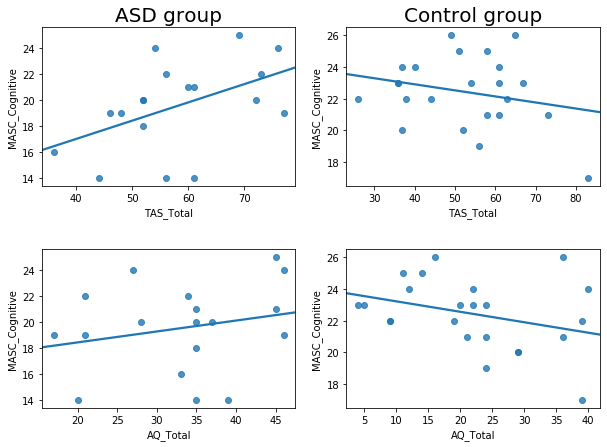

In [13]:
plot_correlations()

The plots above show the correlations between TAS and MASC-Cognitive (top row) and between AQ and MASC-Cognitive (bottom row) for the autism group (left) and the control group (right). The first thing to notice is that in contrast to the control group, both AQ and TAS correlate _positively_ with MASC-Cognitive in the autism group, i.e. individuals with higher AQ or TAS score tend to perform _better_ on the cognitive theory of mind task, MASC-Cognitive. This is also seen from the positive estimated regression coefficients in the regression analysis above.

We can also look at the correlations between the three variables.

In [14]:
print("Pairwise Pearson correlation coefficients between Gender, AQ and TAS in the autism group:")
asd_df[["Gender", "AQ_Total", "TAS_Total"]].corr()

Pairwise Pearson correlation coefficients between Gender, AQ and TAS in the autism group:


,Gender,AQ_Total,TAS_Total
Gender,1.000000,0.118286,0.303863
AQ_Total,0.118286,1.000000,0.325529
TAS_Total,0.303863,0.325529,1.000000


As for the control group we see positive correlations between all three variables. It is thus possible that a real effect of one of the variables on MASC-Cognitive becomes partly diffused onto the other variables, reducing the statistical power to detect the effect when controlling for the other variables.

As we saw above, the amount of autistic traits measured by AQ now correlates positively with MASC-Cognitive, which is contrary to what theory would predict. As it is unlikely that there is a causal _positive_ relationship between AQ and MASC-Cognitive, including AQ in the regression model is not meaningful.

In [15]:
model = smf.ols("MASC_Cognitive ~ Gender + TAS_Total", data=asd_df).fit()
print("Analysis for Gender and TAS without controlling for AQ")
summarize_model(model)

Analysis for Gender and TAS without controlling for AQ


,coef,sum_sq,df,p
Gender,0.101310,0.03364,1.0,0.95436
TAS_Total,0.139108,40.48467,1.0,0.06177
Residual,NaN,149.02302,15.0,NaN


We can see that the p-value for TAS approaches the 0.05 significance threshold, while Gender is far from significant. It is also worth noting that the estimated change in MASC-Cognitive due to a single TAS-point change (0.139) is greater than the entire estimated difference betwen males and females (0.101). Since we saw that Gender and TAS are correlated with each other, it is relevant to also examine the effect of each of the variables without controlling for the other.

In [16]:
model = smf.ols("MASC_Cognitive ~ Gender", data=asd_df).fit()
print("Analysis for Gender without controlling for AQ and TAS")
summarize_model(model)

Analysis for Gender without controlling for AQ and TAS


,coef,sum_sq,df,p
Gender,1.169231,4.93675,1.0,0.52769
Residual,NaN,189.50769,16.0,NaN


In [17]:
model = smf.ols("MASC_Cognitive ~ TAS_Total", data=asd_df).fit()
print("Analysis for TAS without controlling for Gender and AQ")
summarize_model(model)

Analysis for TAS without controlling for Gender and AQ


,coef,sum_sq,df,p
TAS_Total,0.140326,45.38778,1.0,0.04225
Residual,NaN,149.05667,16.0,NaN


We see that the effect of TAS becomes significant when Gender is not controlled for, while the effect of Gender is still far from significant even when not controlling for TAS.

The sum of the above analyses shows a consistent positive correlation between alexithymia traits and cognitive theory of mind in the autism group, although the effect is somewhat attenuated when controlling for differences in gender and overall autism traits. Gender, TAS and AQ also correlate positively with each other, however AQ and Gender correlate much more weakly with MASC-Cognitive than TAS does. It is quite possible that there is a real correlation between TAS and MASC-Cognitive, which is attenuated when controlling for Gender and AQ because these two variables correlate with TAS in the sample.

The fact that AQ correlates _positively_ with MASC-Cognitive, in contrast to theoretical expectations and observations in the control group, also suggests that this correlation is merely driven by the collinearity between AQ and TAS.

The data also contains measurements of age and IQ. For simplicity, these have not been included in the analyses shown here, but adding them to the statistical models do not considerably alter the results. Using the same reasoning as above, we arrive at the same conclusions as presented here, whether age and IQ are initially added as covariates or not.

### Summary

The above analyses are of course exploratory as well as based on a fairly small sample, and no final conclusions can be drawn from them. However, we maintain that the data does suggest an interesting positive correlation between alexithymia traits and cognitive theory of mind specifically in the autism group. There is no obvious reason why alexithymia should directly affect cognitive theory of mind, and we do not claim that a causal relationship between them exists. Rather it is possible that alexithymia could be a marker for a specific subtype of autism that is less impaired on cognitive theory of mind than other subtypes.